In [1]:
require(Seurat)
require(ggplot2)

Loading required package: Seurat

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: ggplot2



In [2]:
adult_telencephalon = readRDS("adult_telencephalon.rds")
adult_diencephalon = readRDS("adult_diencephalon.rds")
adult_mesencephalon = readRDS("adult_mesencephalon.rds")
adult_rhombencephalon = readRDS("adult_rhombencephalon.rds")
lamprey_adult_whole_brain = readRDS("lamprey_adult_whole_brain.rds")

In [3]:
lamprey_all = merge(x = lamprey_adult_whole_brain, y = c(adult_telencephalon, adult_diencephalon, 
                    adult_mesencephalon, adult_rhombencephalon))

In [25]:
lamprey_all@meta.data$Species <- NULL
lamprey_all@meta.data$merged_clusters <- NULL

In [26]:
saveRDS(lamprey_all, "lamprey_all.rds")
# I checked about spinal cord, only 174 cells were identified from spinal cord, 
# methods said only four major part of brain, no spinal cord, so no need to perform further filtering

In [36]:
Idents(lamprey_all) <- "species"
p1 <- VlnPlot(lamprey_all, features = "nFeature_RNA",pt.size = 0) + geom_boxplot(width=.3,col="black",fill="white",outlier.colour=NA) + scale_fill_manual(values = "#1B9E77") + NoLegend() + xlab("Gene") + labs(title="")+ theme(axis.text.x = element_blank())
p2 <- VlnPlot(lamprey_all, features = "nCount_RNA",pt.size = 0) + geom_boxplot(width=.3,col="black",fill="white",outlier.colour=NA) + scale_fill_manual(values = "#D95F02") + NoLegend() + xlab("Transcript") + labs(title="")+ theme(axis.text.x = element_blank()) + ylim(0,15000)
p3 <- VlnPlot(lamprey_all, features = "percent_mito",pt.size = 0) + geom_boxplot(width=.3,col="black",fill="white",outlier.colour=NA) + scale_fill_manual(values = "#7570B3") + NoLegend() + xlab("percent.mt") + labs(title="")+ theme(axis.text.x = element_blank())

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


In [31]:
Idents(lamprey_all) <- "species"

Warning message:
“Removed 4961 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 4961 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


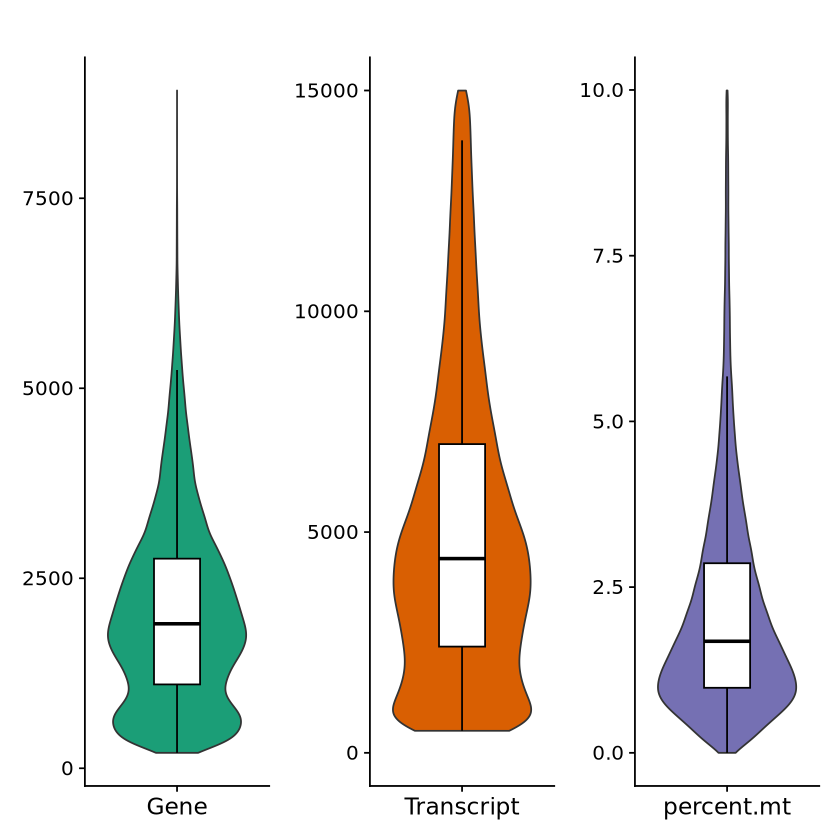

In [37]:
p1|p2|p3

In [5]:
Pmar <- readRDS('lamprey_all.rds')

In [6]:
Pmar@meta.data$cell_type <- Pmar@meta.data$Level3

In [9]:
Pmar_pep_ID <- read.table("Pmar_pep.ID", header =F)$V1
Pmar_count <- GetAssayData(object = Pmar, assay = "RNA", slot = "counts")
# show non-coding genes of Pmar, need to removed
nc <- gsub("-","_", rownames(Pmar_count))[!gsub("-","_", rownames(Pmar_count)) %in% 
                                          gsub("-","_", Pmar_pep_ID)]
Pmar_count <- Pmar_count[!gsub("-","_", rownames(Pmar_count)) %in% nc,]
Pmar_new_atlas <- CreateSeuratObject(counts = Pmar_count, meta.data = Pmar@meta.data)

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”


In [10]:
Pmar_new_atlas[["RNA"]] <- as(Pmar_new_atlas[["RNA"]], "Assay")
sceasy::convertFormat(Pmar_new_atlas, main_layer = "count", from="seurat", to="anndata",
                       outFile='Pmar.wb.h5ad')

Warning message:
“No layers found matching search pattern provided”
Warning message:
“No layers found matching search pattern provided”
Warning message:
“No layers found matching search pattern provided”
Warning message:
“Layer ‘data’ is empty”
Warning message:
“No layers found matching search pattern provided”
Warning message:
“No layers found matching search pattern provided”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Assay RNA changing from Assay5 to Assay”


AnnData object with n_obs × n_vars = 59638 × 17184
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mito', 'RNA_snn_res.0.5', 'RNA_snn_res.1', 'RNA_snn_res.1.5', 'RNA_snn_res.2', 'RNA_snn_res.2.5', 'RNA_snn_res.3', 'RNA_snn_res.3.5', 'RNA_snn_res.4', 'RNA_snn_res.4.5', 'RNA_snn_res.5', 'RNA_snn_res.5.5', 'RNA_snn_res.6', 'RNA_snn_res.6.5', 'RNA_snn_res.7', 'RNA_snn_res.7.5', 'RNA_snn_res.8', 'RNA_snn_res.8.5', 'RNA_snn_res.9', 'RNA_snn_res.9.5', 'RNA_snn_res.10', 'seurat_clusters', 'tSNE3d_1', 'tSNE3d_2', 'tSNE3d_3', 'tSNE2d_1', 'tSNE2d_2', 'UMAP3d_cor_1', 'UMAP3d_cor_2', 'UMAP3d_cor_3', 'UMAP3d_euc_1', 'UMAP3d_euc_2', 'UMAP3d_euc_3', 'UMAP3d_cos_1', 'UMAP3d_cos_2', 'UMAP3d_cos_3', 'UMAP2d_cor_1', 'UMAP2d_cor_2', 'UMAP2d_euc_1', 'UMAP2d_euc_2', 'UMAP2d_cos_1', 'UMAP2d_cos_2', 'cell_types', 'cell_types_num', 'Level1', 'cell_types_def', 'Level2', 'Level3', 'Putative_location', 'Description', 'cell_type'
    var: 'name'

In [ ]:
# replace - with _ for PMZ_ genes since Seurat can't have _